In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project/AIProject/Augmented Images/Augmented Images',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 8120 files belonging to 6 classes.
['Arjun Leaf', 'Curry Leaf', 'Marsh Pennywort Leaf', 'Mint Leaf', 'Neem Leaf', 'Rubble Leaf']


In [8]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/Project/AIProject/trained_plant_model.keras')

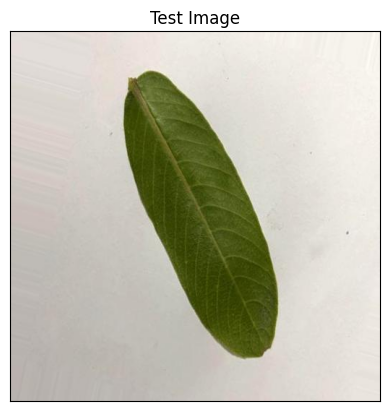

In [15]:
import cv2
image_path = '/content/drive/MyDrive/Project/AIProject/Augmented Images/Augmented Images/Arjun Leaf/Arjun Leaf Aug (1537).jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 347ms/step


In [12]:
print(predictions)

[[9.9999511e-01 1.8500920e-11 6.1959071e-07 2.0176560e-06 1.6265144e-08
  2.2667425e-06]]


In [16]:
result_index = np.argmax(predictions)
print(result_index)

0


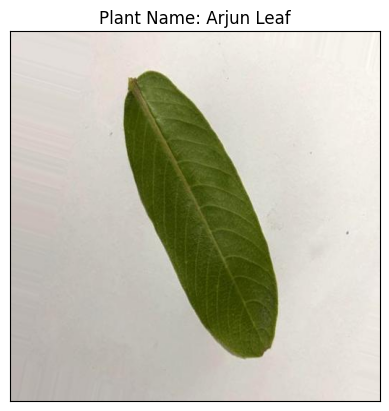

In [18]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Plant Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()